<a href="https://colab.research.google.com/github/ANGELLOPARR/csc466-project/blob/main/NeuralNetExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from tensorflow.keras import layers, models, Input, Model
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

iris = load_iris()
target_names = iris['target_names']

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
enc = OneHotEncoder()
enc.fit(df['target'].values.reshape(-1, 1))

new_target = enc.transform(df['target'].values.reshape(-1, 1))
new_target = pd.DataFrame(new_target.toarray(), columns=target_names)
new_target

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [20]:
df = pd.concat([df.drop('target', axis=1), new_target], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(target_names,axis=1)
t = df[target_names]

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=0)
display(X_train.head(3))
display(t_train.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2


,setosa,versicolor,virginica
137,0.0,0.0,1.0
84,0.0,1.0,0.0
27,1.0,0.0,0.0


In [160]:
bs = int(len(X_train) * 0.04) # 4% of input samples per batch
nepochs = 12

In [161]:
inputs = Input(shape=(4,))

nn = layers.Dense(32, activation='relu')(inputs)
nn = layers.Dense(32, activation='relu')(nn)

outputs = layers.Dense(3, activation='softmax')(nn)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_90 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_91 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, t_train, batch_size=bs, epochs=nepochs, validation_split=0.15)
model.evaluate(X_test, t_test)

Epoch 1/12
26/26 [==============================] - 0s 5ms/step - loss: 1.1360 - accuracy: 0.4008 - val_loss: 0.8875 - val_accuracy: 0.3333
Epoch 2/12
26/26 [==============================] - 0s 1ms/step - loss: 0.7570 - accuracy: 0.6668 - val_loss: 0.7633 - val_accuracy: 0.5556
Epoch 3/12
26/26 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7749 - val_loss: 0.6554 - val_accuracy: 0.7222
Epoch 4/12
26/26 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.8609 - val_loss: 0.5623 - val_accuracy: 0.7778
Epoch 5/12
26/26 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8823 - val_loss: 0.4850 - val_accuracy: 0.8333
Epoch 6/12
26/26 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.9116 - val_loss: 0.4241 - val_accuracy: 0.8333
Epoch 7/12
26/26 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.9219 - val_loss: 0.3895 - val_accuracy: 0.8333
Epoch 8/12
26/26 [==

[0.22137212753295898, 0.9666666388511658]

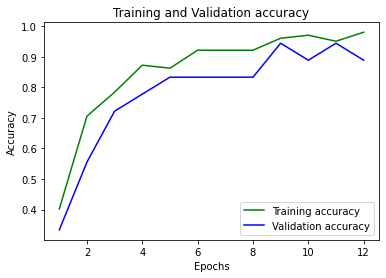

In [163]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,nepochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

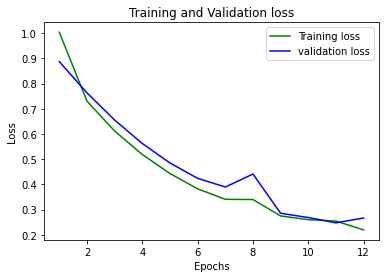

In [165]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,nepochs+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()